In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


we have imported the data. Now we will visualize by plootting thr above data

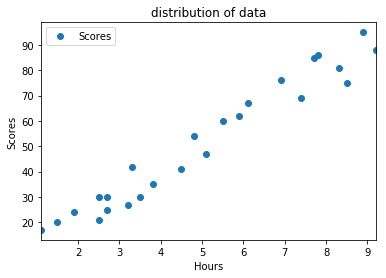

In [8]:
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("distribution of data")
plt.show()

###### from the graph we can see that the distrivution is linear so we can use Linear model to perdict the test data

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [12]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=51)

###### we have separate the data to train and test. so lets train the model

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print("Model is trained")

Model is trained


#####  visualizing the data with a line

In [19]:
y_predict = lr.predict(X)

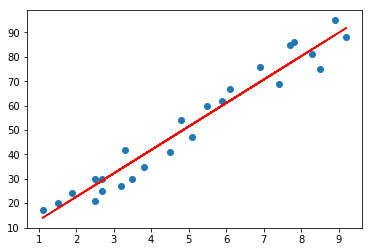

In [20]:
plt.scatter(X,y)
plt.plot(X,y_predict,color='red')
plt.show()

#### or

In [24]:
line = lr.coef_*X + lr.intercept_

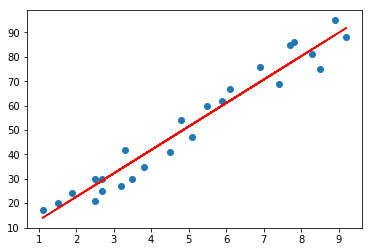

In [27]:
plt.scatter(X,y)
plt.plot(X,line, color='red')
plt.show()

######  Lets see how model react with test data

In [29]:
y_pred = lr.predict(X_test)

In [30]:
y_pred

array([56.24769763, 77.39862373, 69.70737788, 83.16705812, 29.32833714,
       52.40207471, 74.51440654, 34.1353658 ])

##### lets compare the original test label and predicted label

In [34]:
data = pd.DataFrame({'Actual label':y_test,'Predicted label':y_pred})
data

,Actual label,Predicted label
0,60,56.247698
1,85,77.398624
2,76,69.707378
3,81,83.167058
4,30,29.328337
5,47,52.402075
6,69,74.514407
7,27,34.135366


##### Looks like it has got errors. Lets evaluate the error using metrics

In [36]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.817108597564745


###### Now finally lets find how many scores the model predicts for 9.5 hours study

In [46]:
hours = [[9.25]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.3004125718524
